In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors.kde import KernelDensity
from chunk_utils import *

data_dir = './data/names'
image_dir = './images/'

In [2]:
%load_ext autoreload
%autoreload 2
matplotlib.rcParams['figure.figsize'] = 40,15

In [3]:
filenames = list(filter(lambda x: x.endswith('.kdt'), os.listdir(data_dir)))

In [4]:
fn = filenames[2]

with open(data_dir+'//'+fn, 'r') as fh:
    filedata = fh.read()
typedname, rawkd = filedata.split('\n')
n_chars = len(typedname)

name_keys = get_phrases_from_rawkd(rawkd, typedname.lower())    
delays = np.array([keypress2delays(typedname, keys) for keys in name_keys])

typedname = typedname.replace(' ', '_')

In [5]:
models = [KernelDensity() for  x in range(delays.shape[1])]
# for each key in the typed word..build a model
for i in range(delays.shape[1]):
    models[i].fit(delays[:,i].reshape(-1,1))

generated_delays = []

for i in range(20):
    generated_iter = [x.sample()[0][0] for x in models]
    generated_delays.append(generated_iter)
    
generated_delays = np.array(generated_delays)

### how similar are the generated evctors to our original samples?

In [6]:
# print the standard devation of each key-pair-delay from original sample and generated set
for i in range(generated_delays.shape[1]):
    print (np.std(generated_delays[:,i]), np.std(delays[:,i]), " --- ", typedname[i])

13.383168314814895 14.005266866432784  ---  s
14.97057093668335 12.761171576309128  ---  o
7.929546690323417 8.127730310486442  ---  h
17.03920905585031 17.291327305906858  ---  h
11.782200699725346 13.7777900985608  ---  o
95.47998740292066 69.38506683718046  ---  m
108.46186885317856 110.51084788381637  ---  _
18.811630081635037 18.38443635252384  ---  b
21.660162812832663 22.523543238131964  ---  a
13.509143450687654 17.617037208338978  ---  n
12.733589895097401 11.838918869558995  ---  d
33.46909887366864 36.658696103380436  ---  y
12.296787483575025 9.792343948207701  ---  o
10.305294377335569 13.283071933856265  ---  p
8.106195658167353 9.117428365498686  ---  a
14.617238727976735 11.978731151503483  ---  d
9.700098855637757 9.242699822021702  ---  h
12.76040921619425 12.68857754044952  ---  y
13.19609485304332 12.931647226861704  ---  a


### let's plot them..side by side!

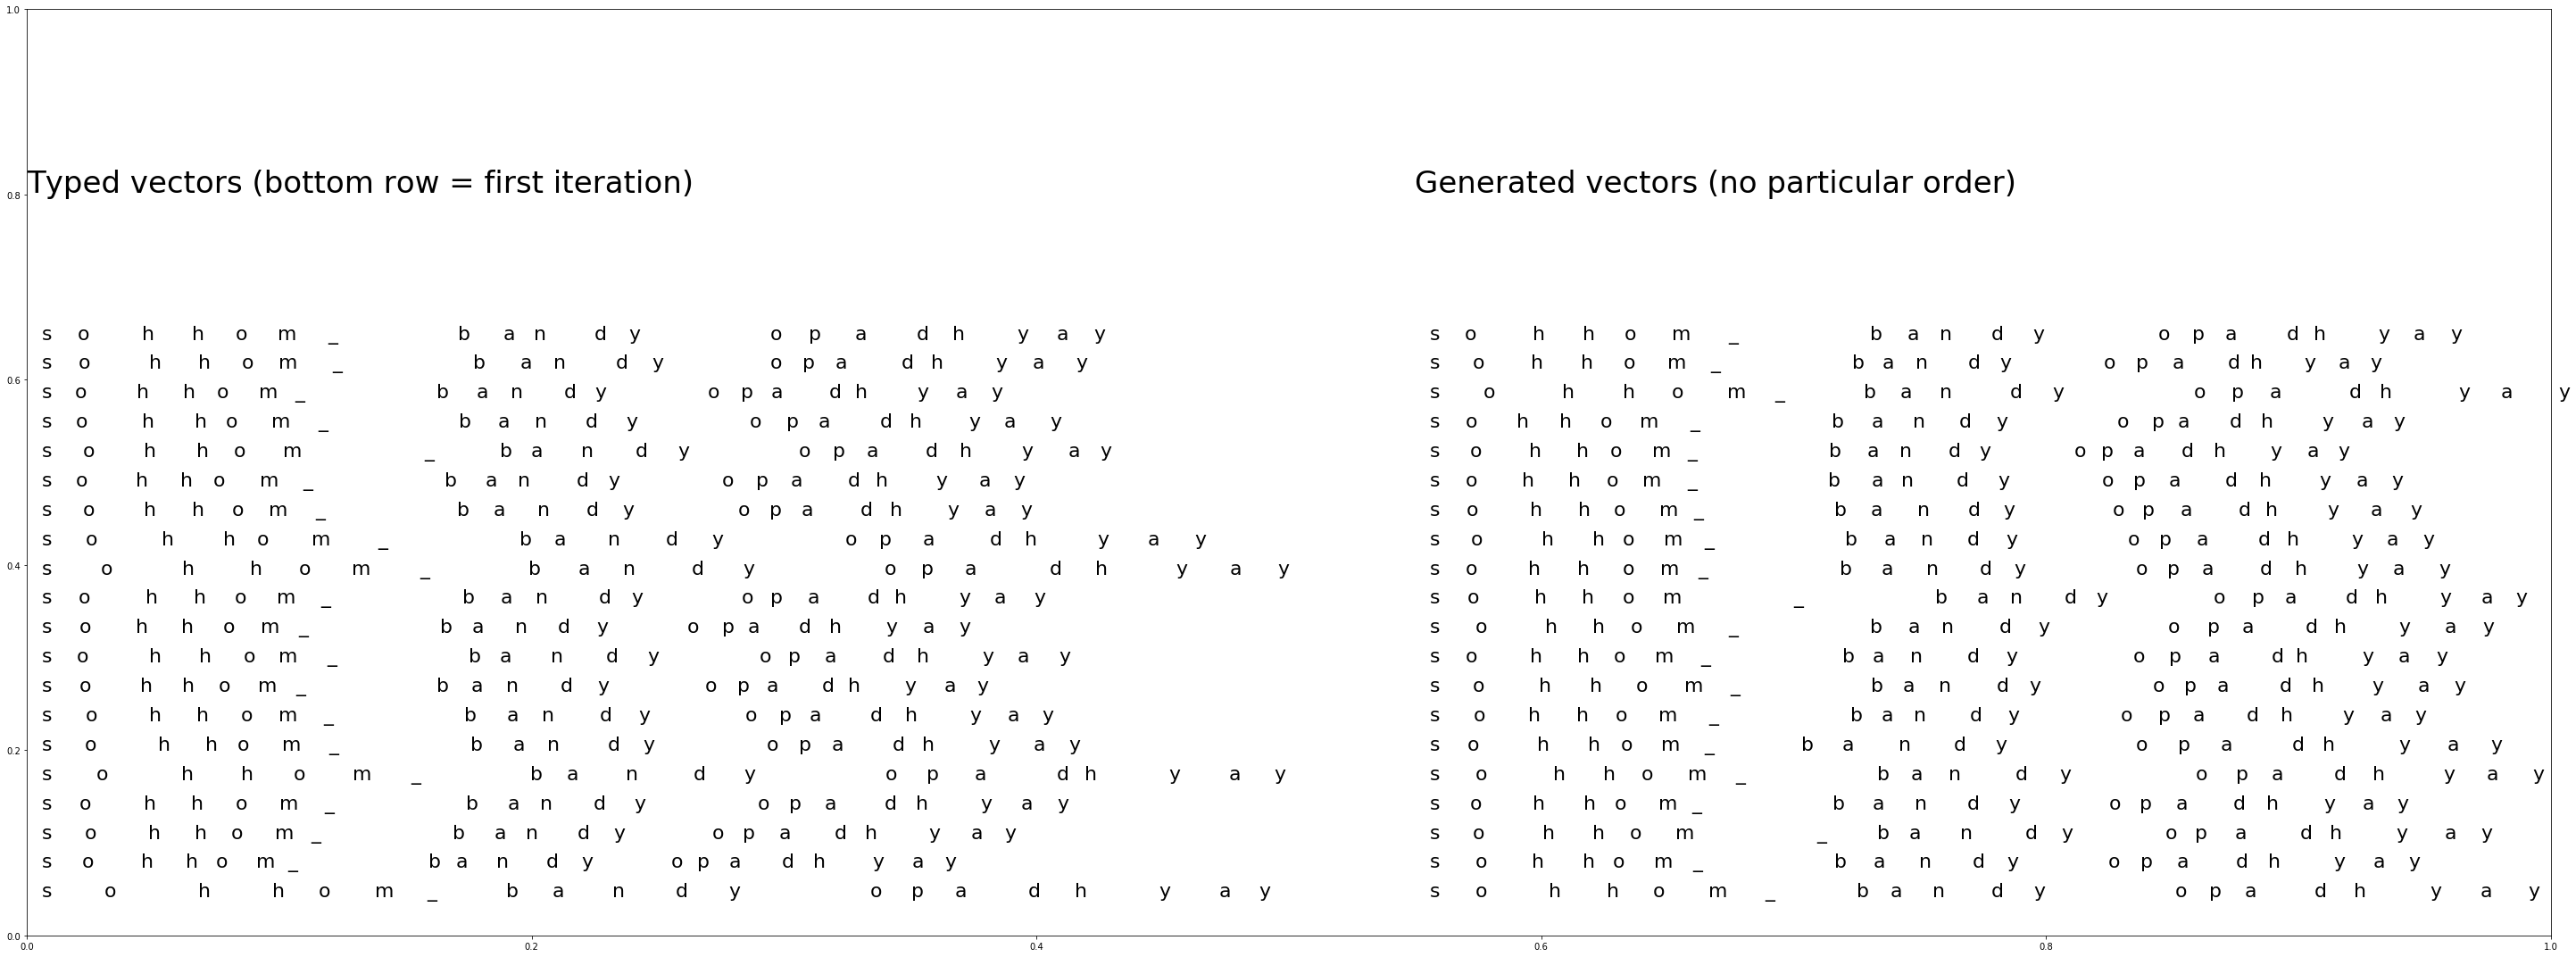

In [7]:
ypos = 0.01
ydelta = 0.0317

for dd in generated_delays:
    xposvector = get_xpos_from_delays(dd, space_min = 0.006, max_delta_spacing=0.05, x_begin=0.55)
    for char, xpos in zip(typedname, xposvector):
        plt.text(xpos, ypos + ydelta, char, fontsize=22)
    ypos += ydelta
plt.text(0.55, ypos+5*ydelta, "Generated vectors (no particular order)", fontsize=34)
    
ypos = 0.01
for dd in delays:
    xposvector = get_xpos_from_delays(dd, space_min = 0.006, max_delta_spacing=0.05, x_begin=0.0)
    for char, xpos in zip(typedname, xposvector):
        plt.text(xpos, ypos + ydelta, char, fontsize=22)
    ypos += ydelta
plt.text(0.0, ypos+5*ydelta, "Typed vectors (bottom row = first iteration)", fontsize=34)


plt.tight_layout()
plt.show()
#plt.savefig(".//images//spatial_plot_" + typedname + "_.svg", format='svg')
#plt.close()

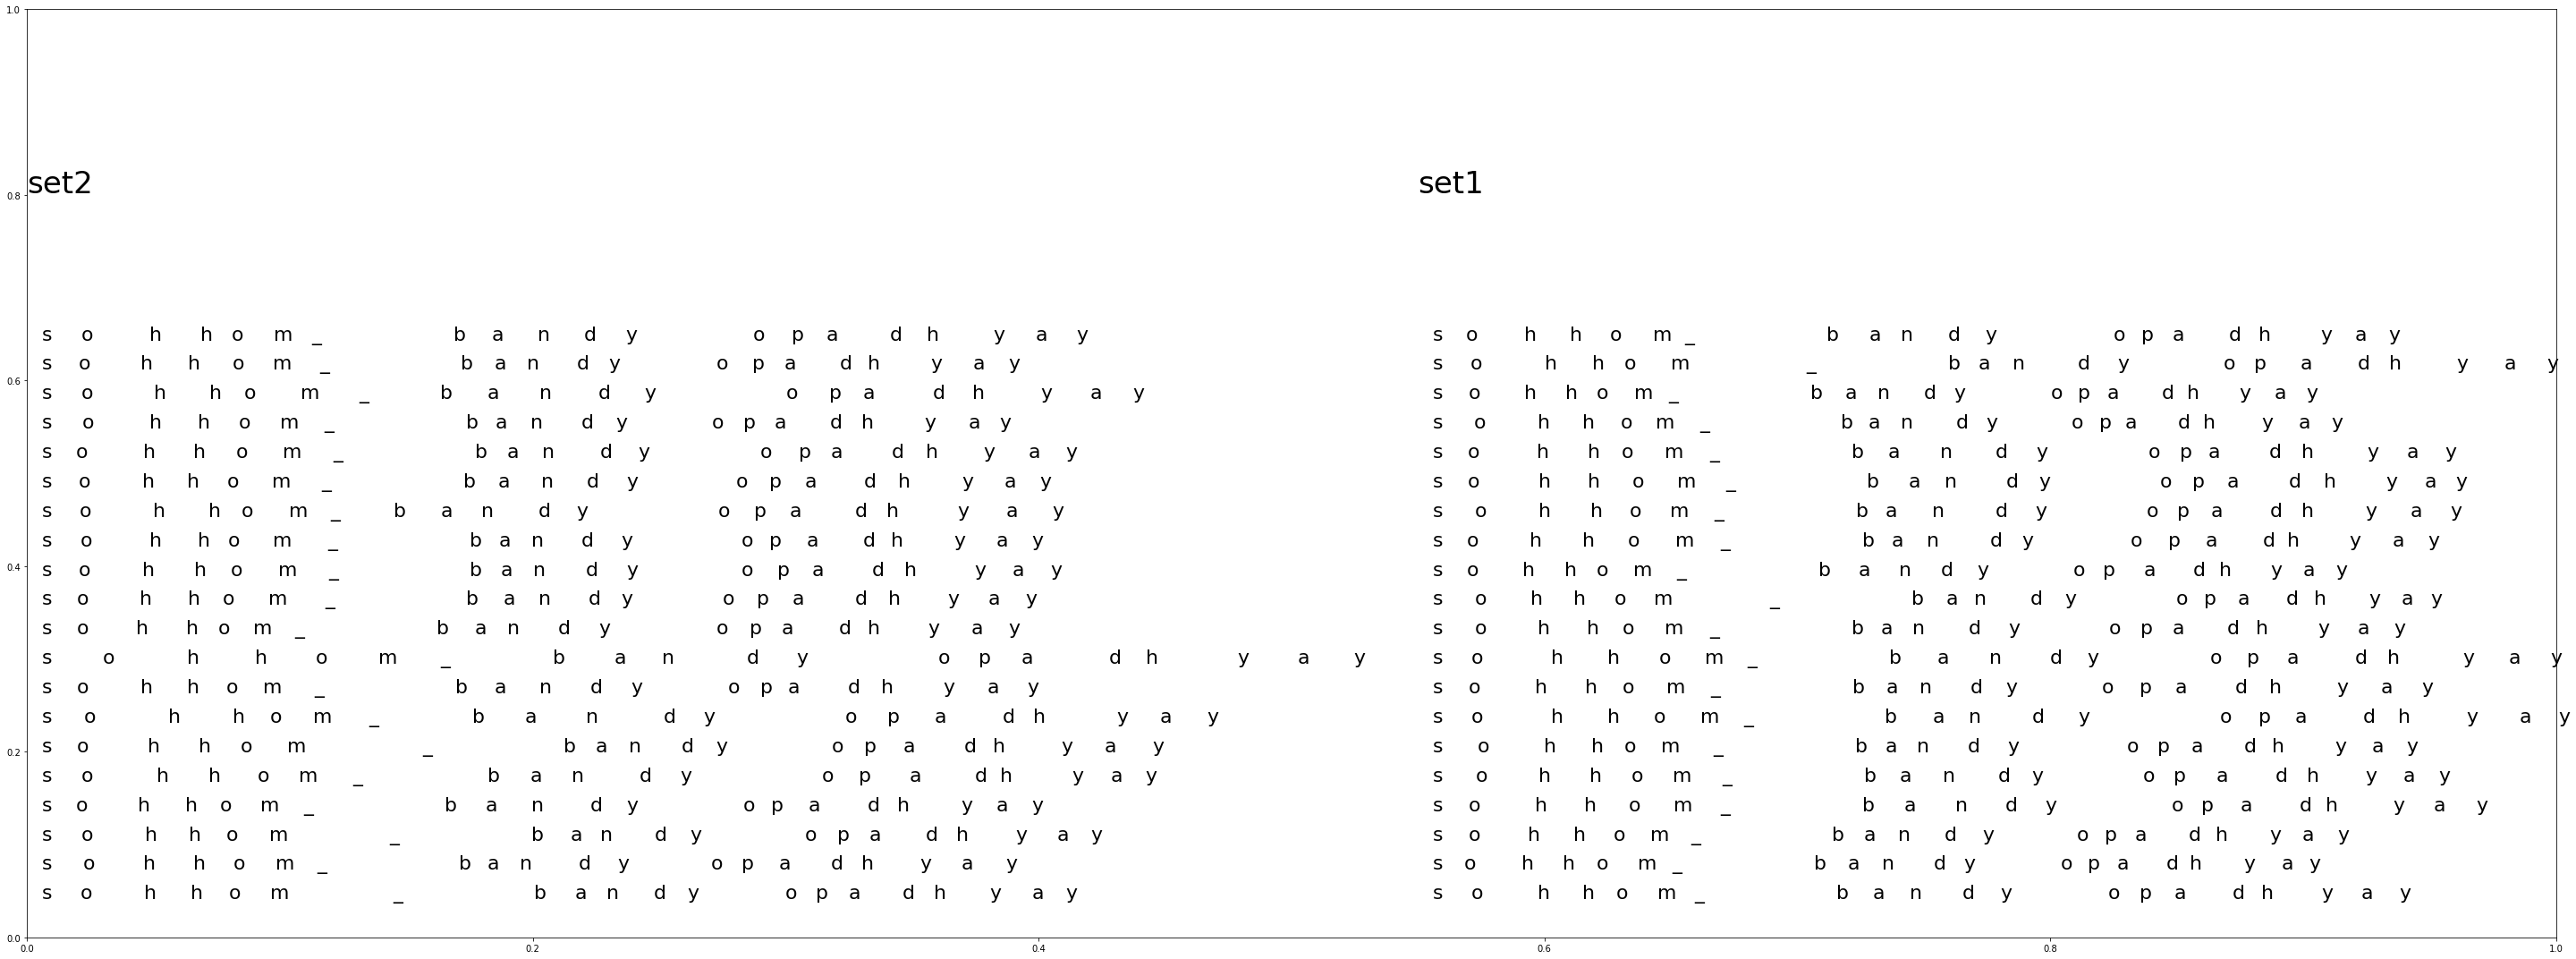

In [11]:
ypos = 0.01
ydelta = 0.0317

generated_delays2 = []

for i in range(40):
    generated_iter = [x.sample()[0][0] for x in models]
    generated_delays2.append(generated_iter)
    
generated_delays2 = np.array(generated_delays2)

# ========================

for dd in generated_delays2[:20]:
    xposvector = get_xpos_from_delays(dd, space_min = 0.006, max_delta_spacing=0.05, x_begin=0.55)
    for char, xpos in zip(typedname, xposvector):
        plt.text(xpos, ypos + ydelta, char, fontsize=22)
    ypos += ydelta
plt.text(0.55, ypos+5*ydelta, "set1", fontsize=34)
    
ypos = 0.01
for dd in generated_delays2[20:]:
    xposvector = get_xpos_from_delays(dd, space_min = 0.006, max_delta_spacing=0.05, x_begin=0.0)
    for char, xpos in zip(typedname, xposvector):
        plt.text(xpos, ypos + ydelta, char, fontsize=22)
    ypos += ydelta
plt.text(0.0, ypos+5*ydelta, "set2", fontsize=34)


plt.tight_layout()
plt.show()
#plt.savefig(".//images//spatial_plot_" + typedname + "_.svg", format='svg')
#plt.close()

In [10]:
len(generated_delays2)

20